In [2]:
#Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

In [5]:
# Load the dataset
data = pd.read_csv('real_estate_data.csv')

In [6]:
data.shape

(10000, 8)

In [7]:
data.head(5)

,Property_ID,Location,Area_sq_ft,Bedrooms,Bathrooms,Year_Built,Amenities,Price
0,P00001,East Kathleenstad,2185,5,2,1990,Garden,280488
1,P00002,Angelamouth,4499,4,3,2016,Garage,869927
2,P00003,East Douglaschester,893,1,3,2019,Garage,312760
3,P00004,East Barbara,2314,1,1,2011,Garden,407385
4,P00005,East Jessicachester,2216,4,2,2006,Pool,184878


In [8]:
data.isnull().values.any()

False

In [9]:
# Data preprocessing
# Convert categorical data to numerical format
data = pd.get_dummies(data, columns=['Location', 'Amenities'], drop_first=True)

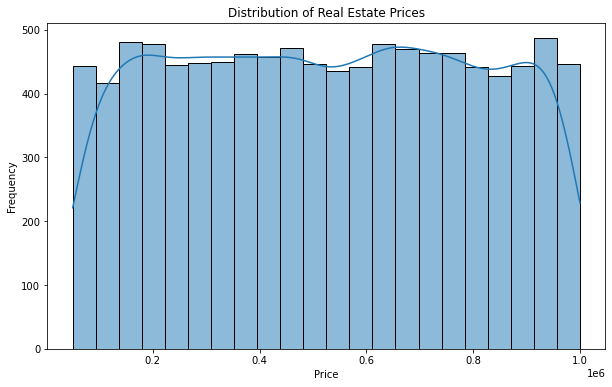

In [10]:
# Exploratory Data Analysis (EDA)
# Visualizing distribution of prices
plt.figure(figsize=(10, 6))
sns.histplot(data['Price'], kde=True)
plt.title('Distribution of Real Estate Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

In [11]:

# Feature Engineering
# Adding polynomial features
poly = PolynomialFeatures(degree=2, include_bias=False)
numeric_features = ['Area_sq_ft', 'Bedrooms', 'Bathrooms', 'Year_Built']
X_poly = poly.fit_transform(data[numeric_features])

In [12]:
# Combine with original data
poly_features = pd.DataFrame(X_poly, columns=poly.get_feature_names(numeric_features))
data = pd.concat([data.reset_index(drop=True), poly_features], axis=1)

In [14]:
# Model Training
X = data.drop(['Property_ID', 'Price'] + numeric_features, axis=1)
y = data['Price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [15]:
# Define the models
models = {
    'LinearRegression': LinearRegression(),
    'RandomForest': RandomForestRegressor(n_estimators=100, random_state=0),
    'GradientBoosting': GradientBoostingRegressor(n_estimators=100, random_state=0)
}

In [16]:
# Train and evaluate models
for name, model in models.items():
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    mse = mean_squared_error(y_test, predictions)
    print(f'{name} Model - MSE: {mse}')

LinearRegression Model - MSE: 2.869332282195367e+18
RandomForest Model - MSE: 83102712740.21416
GradientBoosting Model - MSE: 75229736225.37268


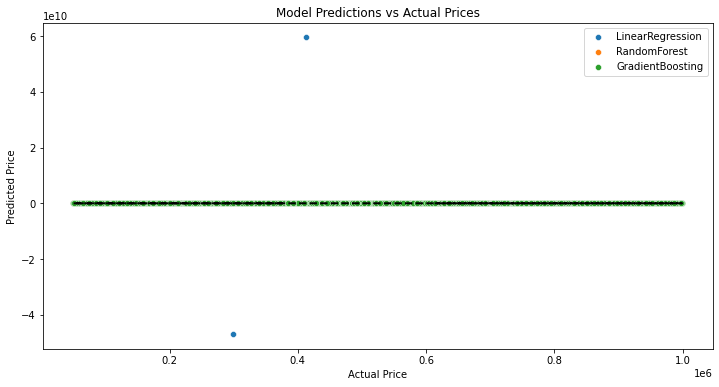

In [17]:
# Visualization of Model Performance
plt.figure(figsize=(12, 6))
for name, model in models.items():
    sns.scatterplot(x=y_test, y=model.predict(X_test), label=name)
plt.plot(y_test, y_test, color='black', lw=2, linestyle='--')
plt.title('Model Predictions vs Actual Prices')
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.legend()
plt.show()

In [ ]:

import tkinter as tk
from tkinter import ttk

# Function to make predictions based on user input
def make_prediction():
    try:
        # Retrieve values from GUI
        area = float(area_entry.get())
        bedrooms = int(bedrooms_entry.get())
        bathrooms = int(bathrooms_entry.get())
        year_built = int(year_built_entry.get())

        # Additional attributes can be added as needed
        # ...

        # Create DataFrame from user input
        input_data = pd.DataFrame([[area, bedrooms, bathrooms, year_built]],
                                  columns=numeric_features)
        input_poly = poly.transform(input_data)
        input_poly_df = pd.DataFrame(input_poly, columns=poly.get_feature_names(numeric_features))

        # Predict using the preferred model (e.g., RandomForest)
        prediction = models['RandomForest'].predict(input_poly_df)[0]

        # Display the prediction
        result_label.config(text=f"Predicted Price: ${prediction:.2f}")
    except ValueError:
        result_label.config(text="Please check the input values.")

# GUI setup
root = tk.Tk()
root.title("Real Estate Price Prediction")

# Creating input fields
tk.Label(root, text="Area (sq ft):").grid(row=0, column=0)
area_entry = tk.Entry(root)
area_entry.grid(row=0, column=1)

tk.Label(root, text="Bedrooms:").grid(row=1, column=0)
bedrooms_entry = tk.Entry(root)
bedrooms_entry.grid(row=1, column=1)

tk.Label(root, text="Bathrooms:").grid(row=2, column=0)
bathrooms_entry = tk.Entry(root)
bathrooms_entry.grid(row=2, column=1)

tk.Label(root, text="Year Built:").grid(row=3, column=0)
year_built_entry = tk.Entry(root)
year_built_entry.grid(row=3, column=1)

# Prediction button
predict_button = tk.Button(root, text="Predict", command=make_prediction)
predict_button.grid(row=4, column=0, columnspan=2)

# Label for showing the result
result_label = tk.Label(root, text="Enter values and click predict.")
result_label.grid(row=5, column=0, columnspan=2)

# Run the application
root.mainloop()